In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **Mercedes-Benz Greener Manufacturing**
* The first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include, for example, the passenger safety cell with crumple zone, the airbag and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium car makers. Daimler’s Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams. .

* To ensure the safety and reliability of each and every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. But, optimizing the speed of their testing system for so many possible feature combinations is complex and time-consuming without a powerful algorithmic approach. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines.

Other aspect of the problem statement are

* If car take more time during testing it will effect on price of the car because Daimler’s is spending there electricity, man-power,warehouse cost and other material. So more the test time more will be the cost of car.

* Other problem Co2 emmision will also increase more is testing machine take more time.

## **About Data**
1. Dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.
2. There is 8 catagorial feature, 1 ID feature, 368 are binary feature, and y column which is time in sec.
  

## **Performance metrics**
1. R^2 (Coefficient of determination)

## **Business Constraints**
1. There no constraint related to test time prediction but still predicting queries should not take must seconds because if it take 40–60 sec to predict then it has no use

## **Data Collection**
1. Kaggle provides a ZIP file which contain Train.csv, Test.csv and Submission.csv https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/data

## **Loading data**

In [2]:
from zipfile import ZipFile
file_name='/content/drive/My Drive/case/mercedes-benz-greener-manufacturing.zip'
with ZipFile(file_name,'r') as Zip:
  Zip.extractall()

In [3]:
file_name='train.csv.zip'
with ZipFile(file_name,'r') as Zip:
  Zip.extractall()

In [4]:
file_name='test.csv.zip'
with ZipFile(file_name,'r') as Zip:
  Zip.extractall()  

In [5]:
import pandas as pd
import numpy as np

## **Importing train data**

In [6]:
train_data=pd.read_csv('train.csv')
print('Train data shape : ',train_data.shape)
train_data.head(2)

Train data shape :  (4209, 378)


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [7]:
print('max of time  : ',max(train_data.y),'  , min of time   :  ',min(train_data.y))

max of time  :  265.32   , min of time   :   72.11


In [8]:
test_data=pd.read_csv('test.csv')
print('Test data shape : ',test_data.shape)
test_data.head(2)

Test data shape :  (4209, 377)


,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Checking duplicate row

In [22]:
train_data.duplicated('ID').sum()

0

#### Observation 
1. There is no duplicated customer or ID

## Importing test data

In [23]:
test_data=pd.read_csv('test.csv')
test_data.shape

(4209, 377)

### Checking null value or not

In [25]:
train_data.isnull().sum().sum()

0

#### Observation
1. No missing value present 

In [26]:
print('Time median : ',train_data.y.median(),' | Time mean : ',train_data.y.mean())

Time median :  99.09  | Time mean :  100.43993800667607


# **Let’s find some pattern in the data**

In [27]:
import matplotlib.pyplot as plt
import seaborn as sb

## Analysis of target variable y

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


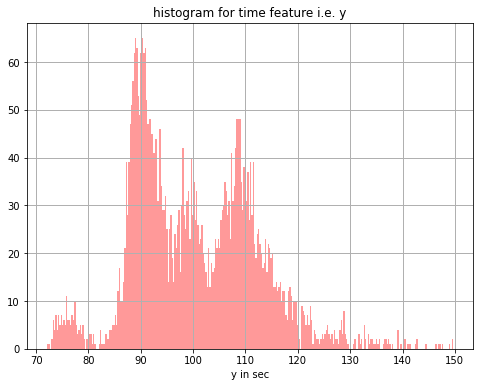

In [28]:
plt.figure(figsize=(8,6))
plt.title('histogram for time feature i.e. y')
sb.distplot(train_data.y, bins=300, kde=False,color='red')
plt.xlabel('y in sec')
plt.grid(linewidth=1,)

### Observation
1. Maximum y lies between 80 to 120
2. y is skewed

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


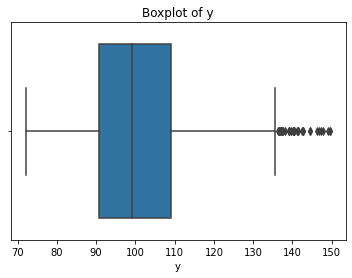

In [29]:
plt.title('Boxplot of y')
sb.boxplot(train_data.y)

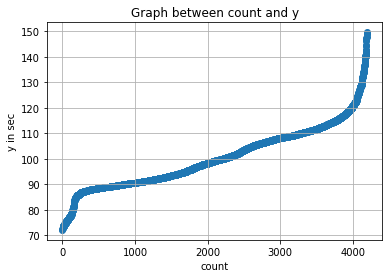

In [30]:
plt.title('Graph between count and y')# count =[1,2,3,4,............4209]
plt.scatter(range(len(train_data)),np.sort(train_data.y))
plt.xlabel('count')
plt.ylabel('y in sec')
plt.grid()

### Observation
1. There is one point which is far from other points.

pdf :  [0.01955174 0.0159752  0.00906056 0.12327134 0.19766333 0.10085837
 0.11230329 0.08917501 0.1416309  0.09155937 0.04577969 0.02122079
 0.01001431 0.00834526 0.0059609  0.00405341 0.00190749 0.00166905] 

bin edge :  [ 72.11        76.41666667  80.72333333  85.03        89.33666667
  93.64333333  97.95       102.25666667 106.56333333 110.87
 115.17666667 119.48333333 123.79       128.09666667 132.40333333
 136.71       141.01666667 145.32333333 149.63      ] 

outlier :  [0.01955174058178347, 0.03552694325226514, 0.0445875059608965, 0.16785884597043377, 0.3655221745350502, 0.46638054363376247, 0.5786838340486411, 0.667858845970434, 0.8094897472579874, 0.9010491177873152, 0.9468288030519789, 0.9680495946590366, 0.9780639008106818, 0.9864091559370528, 0.9923700524558893, 0.996423462088698, 0.9983309489747257, 0.9999999999999999]


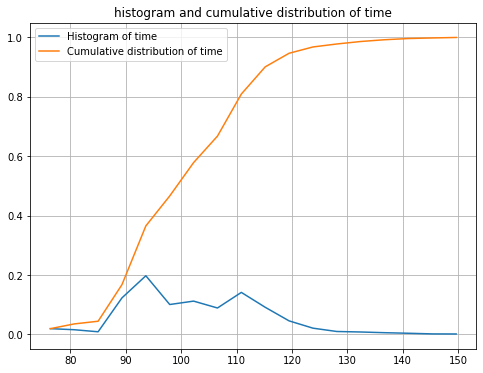

In [31]:
counts, bin_edges = np.histogram(train_data.y, bins=18,density = True,)
pdf = counts/(sum(counts))
print('pdf : ',pdf,'\n');
print('bin edge : ',bin_edges,'\n')
cdf = np.cumsum(pdf)
plt.figure(figsize=(8,6))
plt.plot(bin_edges[1:],pdf,label='Histogram of time')
plt.plot(bin_edges[1:], cdf,label='Cumulative distribution of time')
plt.title('histogram and cumulative distribution of time')
plt.legend()
plt.grid()
c=0
q=[]
for i in pdf:
 c=c+i
 q.append(c)
print('outlier : ',q)

#### Observation
1. We can consider that y>150 be outlier.
2. Almost 99.83368% data cover before 150
#### Approach
Removing row y<150

In [32]:
train_data=train_data[train_data.y<150]

## Analysis of categorical feature

In [33]:
for j,i in enumerate(range(2,9)):
  print('Unique value in X'+str(j),' :')
  print(train_data.iloc[:,i].unique())
  print('No. of unique value : ',train_data.iloc[:,i].unique().shape[0],'\n')
print('Unique value in X8 :')
print(train_data.iloc[:,9].unique())
print('No. of unique value : ',train_data.iloc[:,9].unique().shape[0],'\n')

Unique value in X0  :
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
No. of unique value :  47 

Unique value in X1  :
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
No. of unique value :  27 

Unique value in X2  :
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
No. of unique value :  44 

Unique value in X3  :
['a' 'e' 'c' 'f' 'd' 'b' 'g']
No. of unique value :  7 

Unique value in X4  :
['d' 'b' 'c' 'a']
No. of unique value :  4 

Unique value in X5  :
['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
No. of unique value :  29 


In [34]:
print('Time median : ',train_data.y.median(),' | Time mean : ',train_data.y.mean())

Time median :  99.09  | Time mean :  100.43993800667607


## X0 feature preprocessing

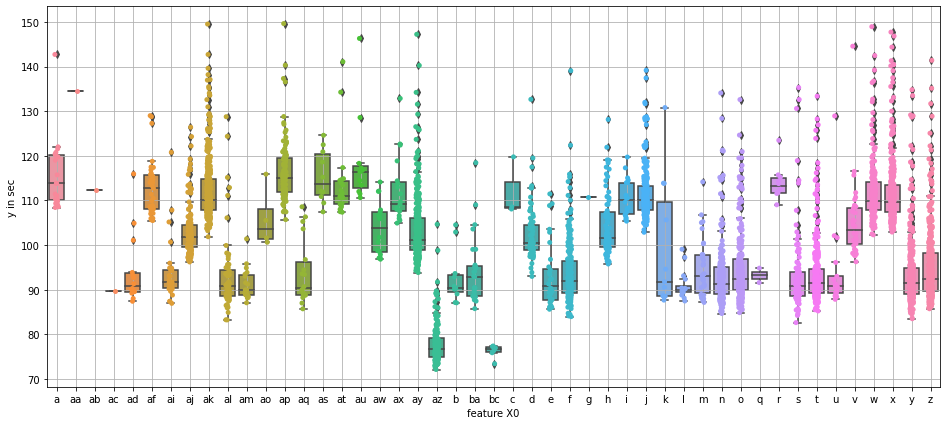

In [35]:
plt.figure(figsize=(16,7))
sb.stripplot(x='X0', y='y', data=train_data, order=np.sort(train_data.X0.unique()).tolist())
sb.boxplot(x='X0', y='y', data=train_data, order=np.sort(train_data.X0.unique()).tolist())
plt.xlabel('feature X0')
plt.ylabel('y in sec')
plt.grid()

#### Observation
This feature is well spread. It mean that all unique item’s lies in some specific range. e.g. all ‘a’ have time greater than 110 ,similarly ‘aa’ have time greater than 135,all ‘az’ time lie below 110 because of this we can guess or predict approx time easily. E.g. if my query point have ‘a’ then i don’t know the exact value but i know that will be more than 110 sec

#### Approach
We can put each unique iteam into sets by looking median.


### Train

In [36]:
def X0_pre(train):
  f1=[]
  f2=[]
  f3=[]
  for i in train.X0.unique():
    a=train_data[train.X0==i].y.median()
    b=train_data[train.X0==i].shape[0]
    if 107<=a :
        f1.append(i)
    if 97<=a and a<107:
        f2.append(i)
    if a<97:
        f3.append(i)
      
  f=[f1,f2,f3]
  d0={}
  c=0
  for i in f:
    for j in i:
      d0[j]=c
    c=c+1
  X0=[]
  for i in train.X0:
    X0.append(d0[i])
  return d0,X0

In [37]:
tr_df=pd.DataFrame(train_data.y,columns=['y'])

In [38]:
D,X=X0_pre(train_data)

In [39]:
tr_df['X0_n']=X

## X2 feature preprocessing

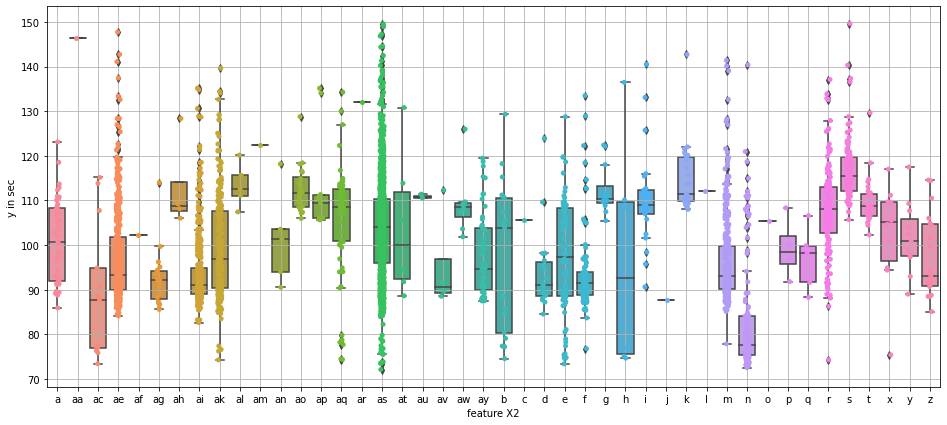

In [40]:
plt.figure(figsize=(16,7))
sb.stripplot(x='X2', y='y', data=train_data, order=np.sort(train_data.X2.unique()).tolist())
sb.boxplot(x='X2', y='y', data=train_data, order=np.sort(train_data.X2.unique()).tolist())
plt.xlabel('feature X2')
plt.ylabel('y in sec')
plt.grid()

In [41]:
train_data[(train_data.X0=='a') & (train_data.y>=100)].shape

(21, 378)

##### Observation
ak,as,ae are the unique value which do not have specific range of time and ak,as,ae cover 69% of total data

In [42]:
def X2_pre(train_data):
  f1=[]
  f2=[]
  f3=[]
  for i in train_data.X2.unique():
    a=train_data[train_data.X2==i].y.median()
    b=train_data[train_data.X2==i].shape[0]
    if 107<=a :
      f1.append(i)
    if 98<=a and a<107:
      f2.append(i)
    if a<98:
      f3.append(i)
  f=[f1,f2,f3]
  d2={}
  c=0
  for i in f:
    for j in i:
      d2[j]=c
    c=c+1
  X2=[]
  for i in train_data.X2:
    X2.append(d2[i])
  return d2,X2

In [43]:
D2,X2=X2_pre(train_data)

In [44]:
tr_df['X2_n']=X2

## X3 feature

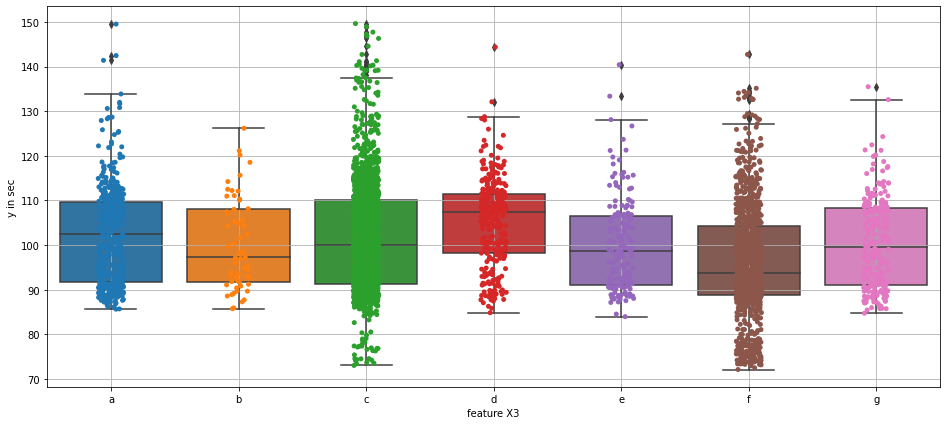

In [45]:
plt.figure(figsize=(16,7))
sb.stripplot(x='X3', y='y', data=train_data, order=np.sort(train_data.X3.unique()).tolist())
sb.boxplot(x='X3', y='y', data=train_data, order=np.sort(train_data.X3.unique()).tolist())
plt.xlabel('feature X3')
plt.ylabel('y in sec')
plt.grid()

## X5 feature

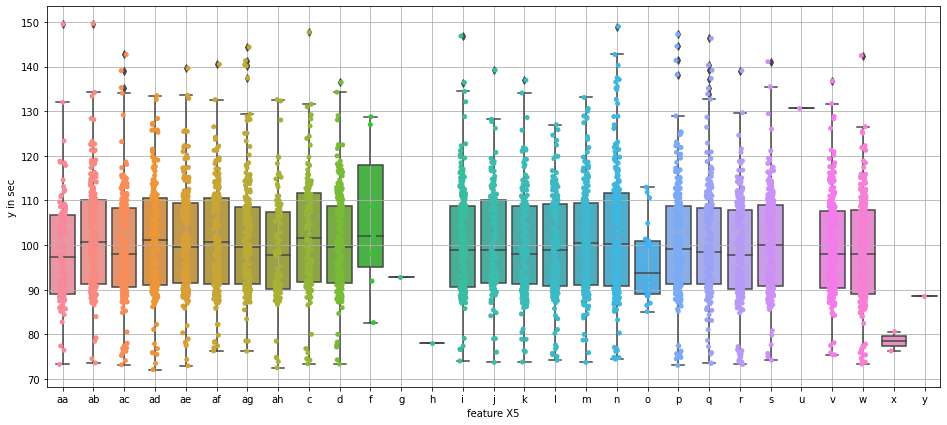

In [46]:
plt.figure(figsize=(16,7))
sb.stripplot(x='X5', y='y', data=train_data, order=np.sort(train_data.X5.unique()).tolist())
sb.boxplot(x='X5', y='y', data=train_data, order=np.sort(train_data.X5.unique()).tolist())
plt.xlabel('feature X5')
plt.ylabel('y in sec')
plt.grid()

## X6 feature

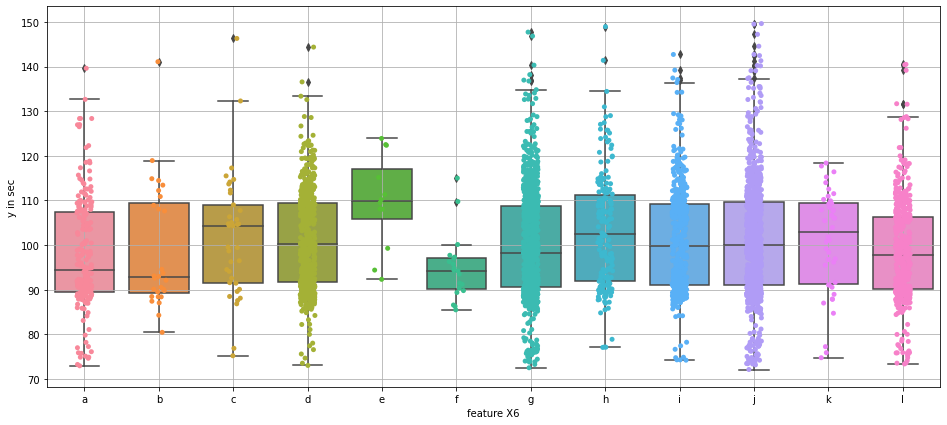

In [47]:
plt.figure(figsize=(16,7))
sb.stripplot(x='X6', y='y', data=train_data, order=np.sort(train_data.X6.unique()).tolist())
sb.boxplot(x='X6', y='y', data=train_data, order=np.sort(train_data.X6.unique()).tolist())
plt.xlabel('feature X6')
plt.ylabel('y in sec')
plt.grid()

## X8 feature

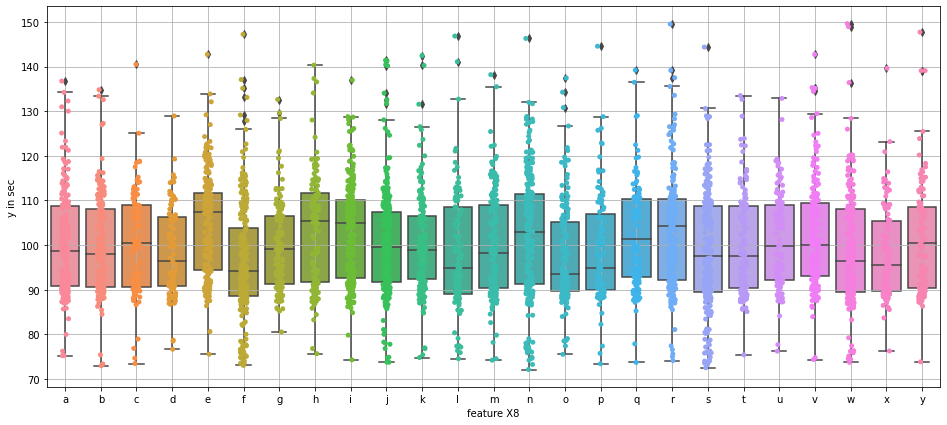

In [48]:
plt.figure(figsize=(16,7))
sb.stripplot(x='X8', y='y', data=train_data, order=np.sort(train_data.X8.unique()).tolist())
sb.boxplot(x='X8', y='y', data=train_data, order=np.sort(train_data.X8.unique()).tolist())
plt.xlabel('feature X8')
plt.ylabel('y in sec')
plt.grid()

## X1 feature

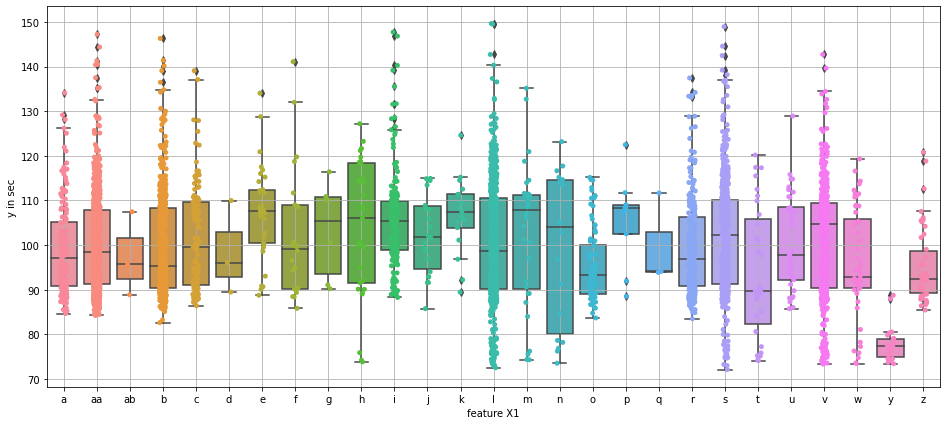

In [49]:
plt.figure(figsize=(16,7))
sb.stripplot(x='X1', y='y', data=train_data, order=np.sort(train_data.X1.unique()).tolist())
sb.boxplot(x='X1', y='y', data=train_data, order=np.sort(train_data.X1.unique()).tolist())
plt.xlabel('feature X1')
plt.ylabel('y in sec')
plt.grid()

#### Observation
1. The feature X3,X1,X5,X6,X8,X4 can not be converted into a different sets because the unique value does not lies into a specific range. It means there is no set pattern. For eg in plot X1 : 'b' value can lies from 83 to 140+ similarly 'c' value can lies from 86 to 138 that's why we put value into sets according to the value ranges.
2. The feature X3,X1,X5,X6,X8,X4,X2 are less informative as compare to X0

## Label Encoding for all categorical feature

In [50]:
import joblib
from sklearn.preprocessing import LabelEncoder
for i in ['X0','X1','X2','X3','X4','X5','X6','X8']:
    lab = LabelEncoder()
    lab.fit(pd.concat([train_data[i],test_data[i]]))
    joblib.dump(lab,i)

In [51]:
for i in ['X0','X1','X2','X3','X4','X5','X6','X8']:
  pre_enc=joblib.load(i)
  tr_df[i]=pre_enc.transform(train_data[i])

## Checking Correlation

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [53]:
mse=[]
for i in tr_df.columns:
  if i!='y':
    lin=LinearRegression()
    lin.fit(tr_df[[i]],tr_df.y)
    mse.append(mean_squared_error(tr_df.y,lin.predict(tr_df[[i]])))

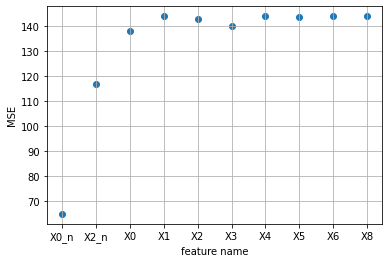

In [54]:
plt.scatter(tr_df.columns[1:],mse)
plt.xlabel('feature name')
plt.ylabel('MSE')
plt.grid()

#### Observation 
1. We can see 'X0_n' is most correlated with targert variable because it's MSE value is much lower in comparision with other feature.

# Binary feature

In [55]:
print('Total no. of binary feature : ',len(train_data.iloc[:,10:].columns.tolist()))

Total no. of binary feature :  368


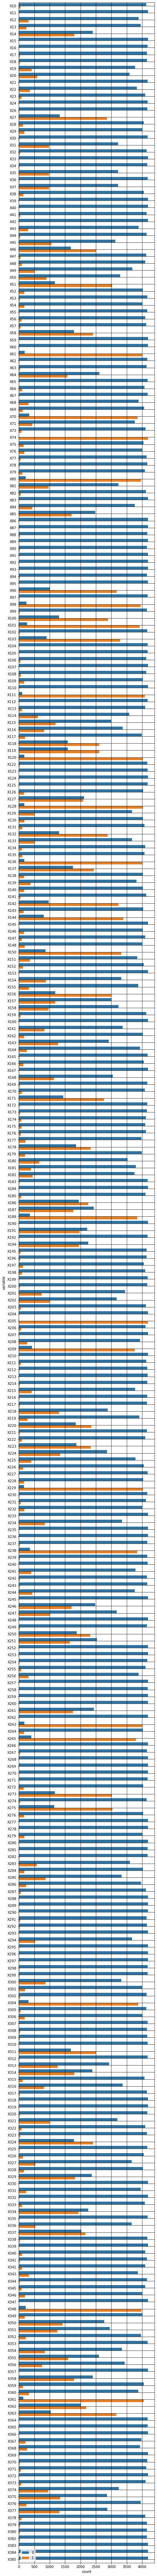

In [56]:
plt.figure(figsize=(7,136))
po=sb.countplot(y='variable',hue='value',data=pd.melt(train_data.iloc[:,10:]))
plt.savefig('/content/drive/My Drive/poo.png')
plt.grid(color='black')
plt.legend()

### All unique feature from X10 to X378

In [57]:
def rem_zero(train):
  inn=[]
  out=[]
  for i in train.iloc[:,10:].columns:
    td=train[i].unique().tolist()
    if len(td)>=2:
      inn.append(i)
    else:
      out.append(i) 
  return inn,out

In [58]:
n,o=rem_zero(train_data)

In [59]:
print('The features contain only 0   : ',o,' : lenght : ',len(o),'\n')
print('The features contain only 0|1 : ',n, ' : lenght : ',len(n))

The features contain only 0   :  ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X339', 'X347']  : lenght :  13 

The features contain only 0|1 :  ['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X

### Observation
1. There are 13 features which have all-zero value. Which means no customer has used those products for there car.
#### Approach
We can remove all zero feature because it do not contain any information. 

### Removing zero columns

In [60]:
bin_data=train_data.loc[:,n]

## **ID feature preprocessing**

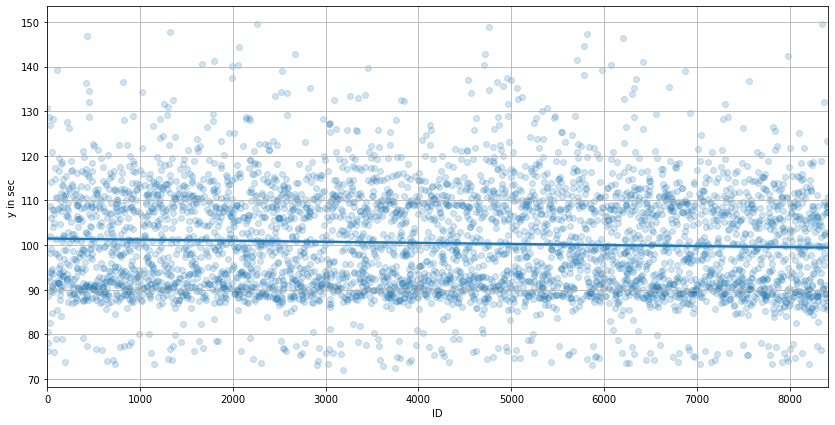

In [61]:
plt.figure(figsize=(14,7))
sb.regplot(x='ID', y='y', data=train_data,scatter_kws={'alpha':0.2},)
plt.xlabel('ID')
plt.ylabel('y in sec')
plt.grid()

#### Observation
1. The linear fitting line(dark blue line) is going down as ID value increase, Which means as ID increase than time taken by a car is also reducing(slightly). 
#### Approach
So we can give less weightage to new id. Which means ID 1st will get more weightage in compare to 10th ID.

### Smoothing the plot b/w target valriable and ID  

In [62]:
median=[]
c=0
d=2000
for i in range(0,8400,2000):
  median.append(np.median(train_data[(train_data.ID>=c) & (train_data.ID<=d)].y))
  c=c+2000
  d=d+2000

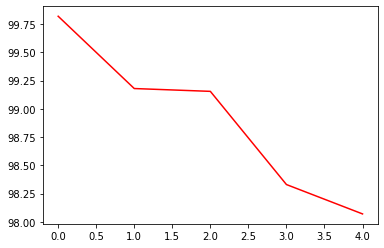

In [63]:
plt.plot(median,'red')

#### Observation
1. We use avg. method to smooth the traget variable.

In [64]:
def rec_id(train):
  ip=[]
  for i in train.ID:
    if i==0:
      ip.append(.35)
    else:
      ip.append(1/(np.log(i)+3))
  return ip

In [65]:
tr_df['ID']=rec_id(train_data)

In [66]:
data_tr=pd.concat([tr_df,bin_data],axis=1)

## **Clustering of X0**

In [67]:
from sklearn.cluster import KMeans

In [68]:
def clust(data,n):
  pf=pd.DataFrame()
  pf['X']=data.X0
  pf['y']=data.y
  encod=data.groupby('X0')['y'].median()
  clust = KMeans(n,random_state=0)
  labels = clust.fit_predict(encod[data['X0'].values].values.reshape(-1,1))
  pf['label']=labels
  lo=clust.inertia_
  return pf,lo

In [69]:
sse=[]
for i in [1,2,3,4,5,6,7,8,9]:
  a,b=clust(train_data,i)
  sse.append(b)

Text(0, 0.5, 'inertia')

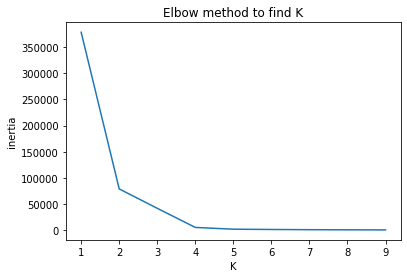

In [70]:
plt.plot(range(1,10),sse)
plt.title('Elbow method to find K')
plt.xlabel('K')
plt.ylabel('inertia')

#### Observation
1. Best number cluster should be 4

In [98]:
d,_=clust(train_data,4)

In [99]:
data_tr['X0_clus']=d.label

In [100]:
for i in [0,1,2,3]:
  print('Cluster',i,' median : ',np.median(data_tr[data_tr['X0_clus']==i].y))
  print('Total percent of data in ',i,' : ',data_tr[data_tr['X0_clus']==i].shape[0]/data_tr.shape[0],'\n')

Cluster 0  median :  91.63
Total percent of data in  0  :  0.4971387696709585 

Cluster 1  median :  110.59
Total percent of data in  1  :  0.30090605627086314 

Cluster 2  median :  76.81
Total percent of data in  2  :  0.043156890796375774 

Cluster 3  median :  101.355
Total percent of data in  3  :  0.15879828326180256 



#### Observation 
1. Max-m number point belongs to cluster 0 with 49.7%

## **Feature importance**

In [101]:
X=data_tr.drop('y',axis=1)
y=data_tr.y

[05:18:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
important feature by XGBoost


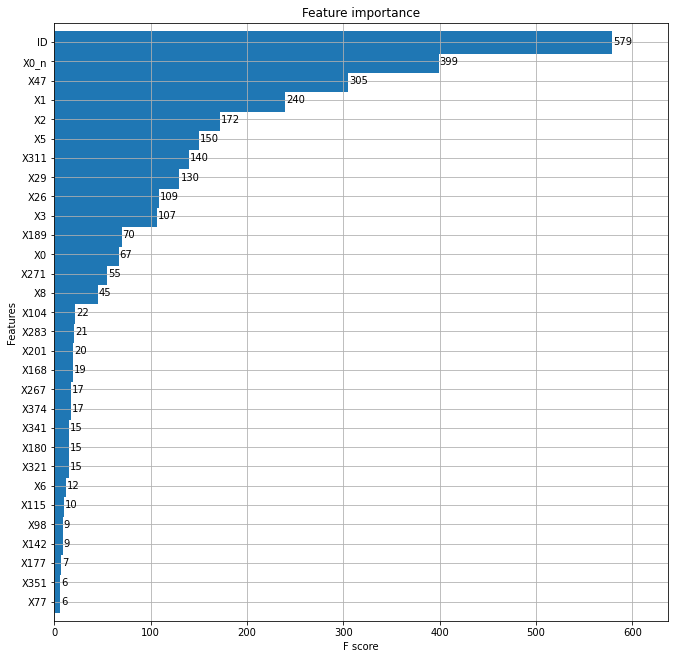

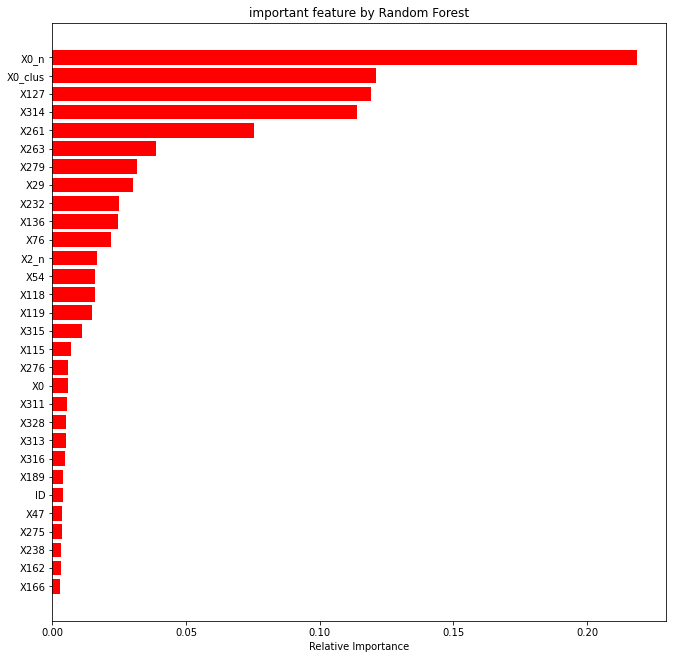

In [102]:
def r2_score(pre, final):
    l = dtrain.get_label()
    return 'r2', r2_score(l, pre)

X=data_tr.drop('y',axis=1)
y=data_tr.y
import xgboost as xgb
params = {'n_trees': 550,'max_depth': 4, 'eta': 0.0045,'eval_metric': 'rmse','subsample': 0.98,'objective': 'reg:linear','base_score': np.mean(y)}
f = xgb.DMatrix(X, y, feature_names=X.columns.values)
model = xgb.train(dict(params), f, num_boost_round=200,)
fig, ax = plt.subplots(figsize=(11,11))
xgb.plot_importance(model, max_num_features=30, height=1.2, ax=ax)
print("important feature by XGBoost")

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200, max_depth=5, max_features=0.2, min_samples_leaf=4, random_state=0)
model.fit(X, y)
features = X.columns
importances = model.feature_importances_
indices = (np.argsort(importances))[-30:]
plt.figure(figsize=(11,11))
plt.title('important feature by Random Forest')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Making new feature

In [103]:
data_tr['X118_plus_X314_plus_X315'] = data_tr.apply(lambda row: row.X118 + row.X314 + row.X315, axis=1)

In [104]:
data_tr['X314_plus_X315'] = data_tr.apply(lambda row: row.X314 + row.X315, axis=1)

### Correlation of these features with target variable

In [105]:
for i in ['X118_plus_X314_plus_X315','X314_plus_X315']:
  lr=LinearRegression()
  lr.fit(data_tr[[i]],data_tr.y)
  print('MSE with feature '+str(i),mean_squared_error(data_tr.y,lr.predict(data_tr[[i]])))  

MSE with feature X118_plus_X314_plus_X315 76.59726836063406
MSE with feature X314_plus_X315 73.5430546149692


#### Observation
These feature MSE value near to 'X0_n' feature.

####  Feature........................................................ MSE
1. X0_n .............................................................. 64.85
2. X118_plus_X314_plus_X315........................ 76.59
3. X314_plus_X315............................................ 73.54

## **Prediction function**

In [141]:
def final(test,model,feature,algo):
  df_test=pd.DataFrame()
  d0,X0=X0_pre(train_data)
  uni=list(d0.keys())
  X_0=[]
  for i in test_data.X0:
    if i in uni:
      X_0.append(d0[i])
    else:
      X_0.append(0)
  df_test['X0_n']=X_0
  #
  d2,X2=X2_pre(train_data)
  uni=list(d2.keys())
  X_2=[]
  for i in test_data.X2:
    if i in uni:
      X_2.append(d2[i])
    else:
      X_2.append(0)
  df_test['X2_n']=X_2
  #label encoding
  for i in ['X0','X1','X2','X3','X4','X5','X6','X8']:
    pre_te_enc=joblib.load(i)
    df_test[i]=pre_te_enc.transform(test[i])
  #binary
  n,o=rem_zero(train_data)
  bin_df=test.loc[:,n]
  #ID
  df_test['ID']=rec_id(test)
  data_te=pd.concat([df_test,bin_df],axis=1)
  #cluster
  dc,_=clust(train_data,4)
  data_te['X0_clus']=test['X0'].map(dc.groupby('X')['label'].median())
  col_name=data_te.columns
  if algo!='xg boost':
    data_te = np.where(np.isnan(data_te.values), 0, data_te.values)
    data_te=pd.DataFrame(data_te,columns=col_name)
  #adding 
  data_te['X118_plus_X314_plus_X315'] = data_te.apply(lambda row: row.X118 + row.X314 + row.X315, axis=1)
  data_te['X314_plus_X315'] = data_te.apply(lambda row: row.X314 + row.X315, axis=1)
  #prediction
  data_te=data_te.loc[:,feature]
  pre=(model.predict(data_te))
  return data_te,pre

# **Model**

## Linear Regression

In [107]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,SGDRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import r2_score

#### Cross val score

In [108]:
p_dic={}
p=[]
for k in [0.18,0.24,0.36,0.44]:
  f=[]
  c=0
  for i in data_tr.columns:
    if i!='y':
      lin=LinearRegression()
      lin.fit(data_tr[[i]],data_tr.y)
      score=r2_score(data_tr.y,lin.predict(data_tr[[i]]))
      if score>k:
        f.append(i)
        c+=1 

  df_xp=data_tr.loc[:,f]
  df_yp=data_tr.y

  cvs=cross_val_score(LinearRegression(),df_xp,df_yp,cv=3,scoring='r2')
  print('Total features : ',c,'and Avg. R2 score : ',np.median(np.sort(cvs)))
  p_dic[np.median(np.sort(cvs))]=f
f=p_dic[np.sort(list(p_dic.keys()))[-1]]  

Total features :  7 and Avg. R2 score :  0.61041428021907
Total features :  6 and Avg. R2 score :  0.6092491164851499
Total features :  5 and Avg. R2 score :  0.5481394694488149
Total features :  3 and Avg. R2 score :  0.5460957707675663


In [109]:
df_xp=data_tr.loc[:,f]
df_yp=data_tr.y

#### Model

In [110]:
lr=LinearRegression()
lr.fit(df_xp,df_yp)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
r2_score(df_yp,lr.predict(df_xp))## train data prediction

0.6174936067592987

In [112]:
data_te,pred=final(test_data,lr,f,'linear regression')## test data prediction

#### Summary

In [113]:
from prettytable import PrettyTable

report = PrettyTable()
report.field_names = ["Model", "hyper parameter", "R2 score",'Kaggle private score']
report.add_row(["Linear Regression", 'Nan', 0.6174,0.5407])
print(report)

+-------------------+-----------------+----------+----------------------+
|       Model       | hyper parameter | R2 score | Kaggle private score |
+-------------------+-----------------+----------+----------------------+
| Linear Regression |       Nan       |  0.6174  |        0.5407        |
+-------------------+-----------------+----------+----------------------+


## Ridge Regression 

#### Cross val score

In [114]:
p_dic={}
p=[]
for k in [0.13,.18,0.24,0.36,0.44]:
  f=[]
  c=0
  for i in data_tr.columns:
    if i!='y':
      lin=Ridge()
      lin.fit(data_tr[[i]],data_tr.y)
      score=r2_score(data_tr.y,lin.predict(data_tr[[i]]))
      if score>k:
        f.append(i)
        c+=1 

  df_xp=data_tr.loc[:,f]
  df_yp=data_tr.y

  cvs=cross_val_score(Ridge(),df_xp,df_yp,cv=3,scoring='r2')
  print('Total features : ',c,'and Avg. R2 score : ',np.median(np.sort(cvs)))
  p_dic[np.median(np.sort(cvs))]=f
f=p_dic[np.sort(list(p_dic.keys()))[-1]]  

Total features :  18 and Avg. R2 score :  0.6112983471067194
Total features :  7 and Avg. R2 score :  0.6098326140927799
Total features :  6 and Avg. R2 score :  0.6086570164670546
Total features :  5 and Avg. R2 score :  0.5479842656066667
Total features :  3 and Avg. R2 score :  0.5461047328111706


In [115]:
df_xp=data_tr.loc[:,f]
df_yp=data_tr.y

#### Finding best param

In [116]:
para=[{'alpha':[0.001,0.01,1,6,10,20,100]}]
gsv=GridSearchCV(estimator=Ridge(),scoring='r2',param_grid=para)
gsv.fit(df_xp,df_yp)
print('Best param : ',gsv.best_params_)

Best param :  {'alpha': 6}


In [117]:
df_xp=data_tr.loc[:,f]
df_yp=data_tr.y

#### Model

In [118]:
rid=Ridge(alpha=6)

In [119]:
rid.fit(df_xp,df_yp)

Ridge(alpha=6, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [120]:
r2_score(df_yp,rid.predict(df_xp))## train data prediction

0.6229736438324186

In [121]:
data_te,pred=final(test_data,rid,f,'ridge')## test data prediction

#### Summary

In [122]:
report.add_row(["Ridge Regression", 'aplha = 6', 0.6229,0.54108])
print(report)

+-------------------+-----------------+----------+----------------------+
|       Model       | hyper parameter | R2 score | Kaggle private score |
+-------------------+-----------------+----------+----------------------+
| Linear Regression |       Nan       |  0.6174  |        0.5407        |
|  Ridge Regression |    aplha = 6    |  0.6229  |       0.54108        |
+-------------------+-----------------+----------+----------------------+


## Decision tree

In [123]:
from sklearn.tree import DecisionTreeRegressor

#### Finding best param

In [124]:
para=[{'max_depth':[1,2,3,5,10,50,100,200,500]}]
gsv=GridSearchCV(estimator=DecisionTreeRegressor(),scoring='r2',param_grid=para)
gsv.fit(X,y)
print('Best param : ',gsv.best_params_)

Best param :  {'max_depth': 3}


In [125]:
dt=DecisionTreeRegressor(max_depth=3)

In [126]:
dt.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [127]:
r2_score(y,dt.predict(X))## train data prediction

0.630212526041533

In [128]:
data_te,pred=final(test_data,dt,X.columns,'random forest')## test data prediction

#### Summary

In [133]:
report.add_row(["Decision Tree", 'depth = 3',0.6302,0.54791])
print(report)

+-------------------+-----------------+----------+----------------------+
|       Model       | hyper parameter | R2 score | Kaggle private score |
+-------------------+-----------------+----------+----------------------+
| Linear Regression |       Nan       |  0.6174  |        0.5407        |
|  Ridge Regression |    aplha = 6    |  0.6229  |       0.54108        |
|   Decision Tree   |    depth = 3    |  0.6302  |       0.54791        |
|   Decision Tree   |    depth = 3    |  0.6302  |       0.54791        |
+-------------------+-----------------+----------+----------------------+


## Xg Boost

In [134]:
X=data_tr.drop('y',axis=1)
y=data_tr.y

In [135]:
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [136]:
xgbr=XGBRegressor()
prams={
 'learning_rate':[.01,.04,.1],
 'n_estimators':[400,500,600,700,800],
 'colsample_bytree':[0.35,.55,0.65,0.75],
 'subsample':[0.35,.55,0.65,0.85,1],
 'gamma':[.15,.65,.85,],
 'colsample_bylevel':[.45,.65,.75,.95]
 }
gsv=GridSearchCV(xgbr,prams,scoring='r2',cv=4)
#gsv.fit(X, y)

In [137]:
#print(tp.best_params_)

In [138]:
xg=XGBRegressor(learning_rate=.01,max_depth=3,n_estimators=600,colsample_bytree=.55,subsample=.85,gamma=.65,colsample_bylevel=.95)
xg.fit(X,y)

[05:19:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.95,
             colsample_bynode=1, colsample_bytree=0.55, gamma=0.65,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=600,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.85, verbosity=1)

In [277]:
joblib.dump(xg,'model')

['model']

In [139]:
r2_score(y,xg.predict(X))## train data prediction

0.6553283609988065

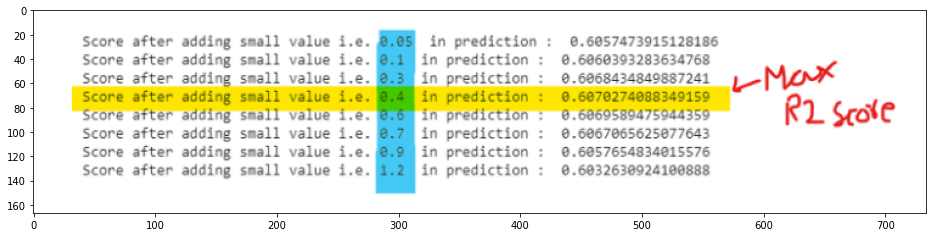

In [152]:
plt.figure(figsize=(16,9))
plt.imshow(plt.imread('constant.png'))

#### Observation 
We can see by adding small contant in predict value we got some increment in R2 score

In [153]:
r2_score(y,xg.predict(X)+0.4)## train data prediction

0.6555987797628255

In [156]:
data_te,pred=final(test_data,xg,X.columns,'xg boost')## test data prediction

#### Summary

In [157]:
report.add_row(["Xg boost", 'learning_rate=.01, n_estimators=600, colsample_bytree=.55, subsample=.85, gamma=.65, colsample_bylevel=.95', 0.6553,0.55329])
print(report)

+-------------------+------------------------------------------------------------------------------------------------------------+----------+----------------------+
|       Model       |                                              hyper parameter                                               | R2 score | Kaggle private score |
+-------------------+------------------------------------------------------------------------------------------------------------+----------+----------------------+
| Linear Regression |                                                    Nan                                                     |  0.6174  |        0.5407        |
|  Ridge Regression |                                                 aplha = 6                                                  |  0.6229  |       0.54108        |
|   Decision Tree   |                                                 depth = 3                                                  |  0.6302  |       0.54791        |
|   Decisi

## Final submission Kaggle 

In [100]:
final=pd.DataFrame()
final['ID']=test_data.ID
final['y']=pred

In [101]:
test=pd.merge(test_data,final,on='ID')

#### Final Observation Why X0 work better
1. We notice that in train data whose car testing time was less than 80 in that 95.77% have X0 feature value as 'az', 100% have X27,X10 feature value as 1,0 resp. 
Similarly in prediction whose car testing time was less than 80 in that 96.15% have X0 feature as 'az', 100% have X27,X10 feature value as 1,0 resp.
2. We notice that in train data whose car testing time between 90 and 100 in that 72.1 % have X0 feature value as ['y','z','t','o','f','n','s','al','e'].
Similarly in prediction whose car testing time between 90 and 100 in that 84.4 % have X0 feature value as ['y','z','t','o','f','n','s','al','e'].  
3. We notice that in train data whose car testing time between 100 and 120 in that 79.4 % have X0 feature value as ['ak','x','ay','w' ,'j','aj','ap','h','d','v'].
Similarly in prediction whose car testing time between 100 and 120 in that 89.3 % have X0 feature value as ['ak','x','ay','w' ,'j','aj','ap','h','d','v'].

## kaggle leaderboard
1. private 0.55329
2. public  0.55621

In [158]:
print('XG boost result for test dataset : ',pred+.4)

XG boost result for test dataset :  [ 85.68865  102.376595  85.50872  ...  93.08515  110.703636  92.89591 ]
